id: unique id for a news article

title: the title of a news article

author: author of the news article

text: the text of the article; could be incomplete

label: a label that marks the article as potentially unreliable

1: unreliable

0: reliable

Importing the dependencies

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
import nltk
nltk.download('stopwatch')

[nltk_data] Error loading stopwatch: Package 'stopwatch' not found in
[nltk_data]     index


False

Loading the data into pandas file

In [64]:
news_data = pd.read_csv('/content/train.csv')

In [65]:
#print first 5 rows
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [66]:
#print number of rows and columns
news_data.shape

(20800, 5)

In [67]:
#cheek if there is null values in the dataframe
news_data.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [68]:
#replace the null values with empty string
news_data=news_data.fillna('')

In [91]:
#merge the author name with the title
news_data['content']=news_data['author']+' '+news_data['title']

In [70]:
print(news_data['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


#Data Visualization

In [71]:
print(news_data.columns)

Index(['id', 'title', 'author', 'text', 'label', 'content'], dtype='object')


In [72]:
news_data['label'].value_counts()

,count
label,
1,10413
0,10387


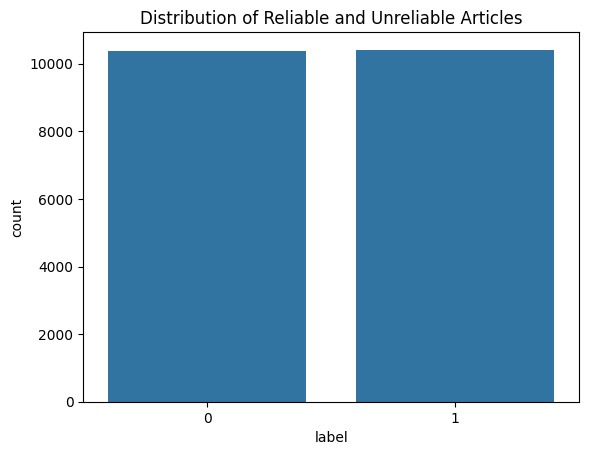

In [73]:
sns.countplot(x='label', data=news_data)
plt.title('Distribution of Reliable and Unreliable Articles')
plt.show()

Author Analysis

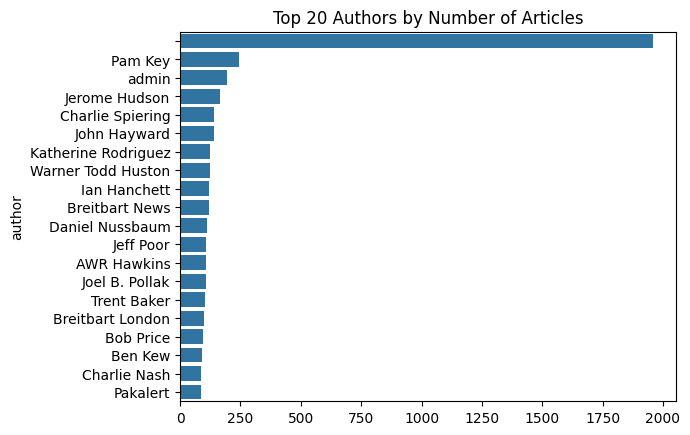

In [74]:
author_counts = news_data['author'].value_counts().head(20)
sns.barplot(y=author_counts.index, x=author_counts.values)
plt.title('Top 20 Authors by Number of Articles')
plt.show()

Title Length Analysis

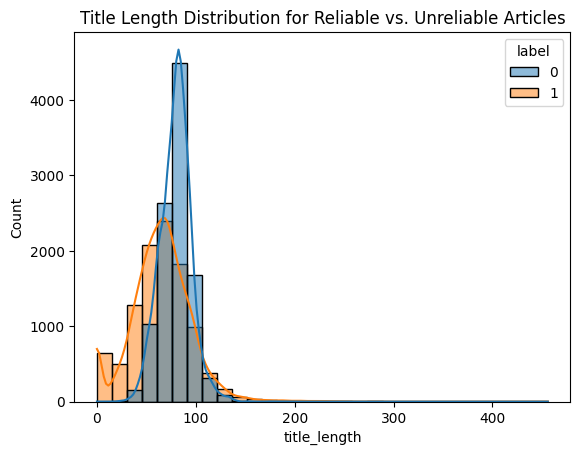

In [75]:
news_data['title_length'] = news_data['title'].apply(lambda x: len(str(x)))
sns.histplot(data=news_data, x='title_length', hue='label', bins=30, kde=True)
plt.title('Title Length Distribution for Reliable vs. Unreliable Articles')
plt.show()

 visualize the most common words in reliable and unreliable articles.

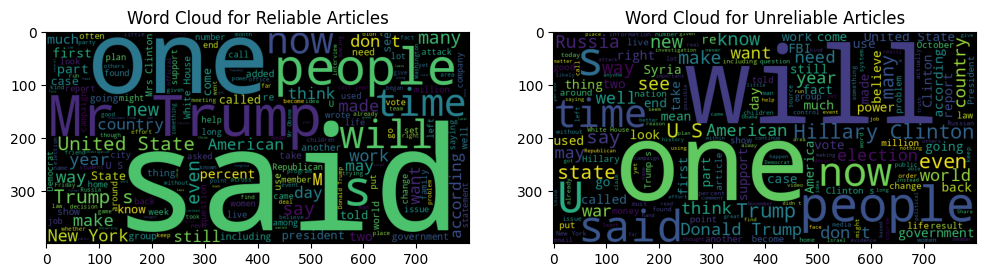

In [76]:
from wordcloud import WordCloud

reliable_text = ' '.join(news_data[news_data['label'] == 0]['text'].dropna())
unreliable_text = ' '.join(news_data[news_data['label'] == 1]['text'].dropna())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=800, height=400).generate(reliable_text))
plt.title('Word Cloud for Reliable Articles')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=800, height=400).generate(unreliable_text))
plt.title('Word Cloud for Unreliable Articles')

plt.show()

In [77]:
#separating the data and labels
x=news_data.drop(columns='label',axis=1)
y=news_data['label']

In [78]:
print(x)
print(y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

stremming the data

In [94]:
port_stem=PorterStemmer()

In [95]:
def stremming (content):
  stemmed_content=re.sub('[^a-zA-Z]',' ' ,content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content= ' '.join(stemmed_content)
  return stemmed_content

In [96]:
news_data['content']=news_data['content'].apply(stremming)

In [87]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [88]:
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Example usage
stop_words = set(stopwords.words('english'))
print(stop_words)


{'its', 'these', 'so', 'having', 'any', "shouldn't", 'shan', 'who', 'now', 'you', 'shouldn', 'once', "haven't", 'an', 'what', 'while', 'can', 'a', 'during', 'was', 'hadn', 'doing', 've', 'more', "mustn't", 'because', 'if', 'under', 'me', 'his', 'than', 'your', "she's", "hasn't", "weren't", 'after', 'my', 'their', 'themselves', 'further', 'with', 'above', 'll', 'are', 'hers', 'we', 'nor', 'needn', 'her', 'own', 's', 'wasn', 'him', 'the', 'himself', 'as', 'mustn', 'were', 'until', 'ain', 'each', 'which', 'mightn', 'off', 'has', 'ourselves', 'not', 'wouldn', 'for', 'here', "it's", 'very', 'again', 'or', 'she', 'yours', 'have', 'just', 'such', 'will', "that'll", 'it', 'from', 'why', 'being', 'had', 'on', 'do', "aren't", "you've", 'couldn', "doesn't", 'won', 'been', 'yourself', 'in', 'to', "you'll", 'too', 'by', 'is', 'did', 'between', 'most', "won't", 'only', 'aren', "wasn't", "you'd", 'yourselves', 'itself', 'but', 'over', 'should', 'and', 'isn', 'they', 'before', 'up', 'other', 'd', 'aga

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
print(news_data['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [98]:
x=news_data['content'].values
y=news_data['label'].values

In [108]:
x.shape

(20800, 17128)

In [109]:
y.shape

(20800,)

In [99]:
print(x)
print(y)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']
[1 0 1 ... 0 1 1]


In [100]:
#converting the textual data to numeric data
vectorizer=TfidfVectorizer()

In [101]:
vectorizer.fit(x)
x=vectorizer.transform(x)
print(x)

  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (20797, 8364)	0.22322585870464115
  (20797, 8988)	0.36160868928090795
  (20797, 9518)	0.29542040034203126
  (20797, 9588)	0.17455348

spliting the dataset into training and test dats

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [107]:
print(x.shape,x_train.shape,x_test.shape)

(20800, 17128) (16640, 17128) (4160, 17128)


Training the model

In [110]:
model=LogisticRegression()

In [111]:
model.fit(x_train,y_train)

LogisticRegression()

Evaluation

In [113]:
#accuracy score on the training data
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('the accuracy of training data is :' ,training_data_accuracy)

the accuracy of training data is : 0.9863581730769231


In [115]:
#accuracy score on the training data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('the accuracy of test data is :' ,test_data_accuracy)

the accuracy of test data is : 0.9790865384615385


Making a prediction system

In [116]:
x_new = x_test[0]
prediction=model.predict(x_new)
print(prediction)
if(prediction[0]==0):
  print('the news is real')
else:
  print('the news is fake')

[1]
the news is fake


In [117]:
print (y_test[0])

1


that mean that the model predict the value true

##############

In [121]:

# Sample input data
inputData = (5, 'Breaking news: Major storm approaching', 'John Doe',
             'A major storm is expected to make landfall tonight, causing disruptions.')

# Extract the relevant feature (text) for prediction
text_input = [inputData[3]]  # The text part of the input data

# Transform the input text using the same TF-IDF vectorizer used during training
input_vector = vectorizer.transform(text_input)

# Make a prediction using the trained model
prediction = model.predict(input_vector)

# Print the prediction result
if prediction[0] == 0:
    print("The news is real.")
else:
    print("The news is fake.")


The news is fake.
